In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [2]:
marks = ['.k-', '.k--', 'xk-', 'xk--', '*k--']

In [3]:
def slope_markers(x1, y1, x2, y2, marker, left_ref=0):
    plt.plot([left_ref, x1], [y1, y1], marker)
    plt.plot([left_ref, x2], [y2, y2], marker)
    plt.plot([x2, x2], [0, y2], marker)
    plt.plot([x1, x1], [0, y1], marker)
    
    slope = np.abs((y2-y1)/(x2-x1))
    return slope

# CE config (NPN)

In [4]:
rb, rc = 99000, 1000

### input characterstics

In [5]:
input_chars1 = {
    'vce': 0,
    'vbe': np.array([0.0017, 0.051, 0.101, 0.153, 0.202, 0.250, 0.305, 0.353, 0.4,0.455, 0.502, 0.555, 0.57, 0.58, 0.591, 0.601, 0.614]),
    'vrb': np.array([0, 0.0005, 0.0011, 0.0017, 0.0022, 0.0028, 0.0029, 0.0032,0.0137, 0.0816, 0.441, 2.838, 4.78, 6.38, 9.17, 11.96, 17.14]),
}

input_chars2 = {
    'vce': 2,
    'vbe': np.array([0.0027, 0.052, 0.1003, 0.1498, 0.2038, 0.2538, 0.3025, 0.3514, 0.404, 0.451, 0.501, 0.526, 0.551, 0.574, 0.601, 0.639, 0.666]),
    'vrb': np.array([0, 0.0001, 0.0001, 0.0003, 0.0004, 0.0005, 0.0006, 0.0008, 0.0049, 0.0073, 0.0237, 0.0512, 0.1241, 0.2901, 0.801, 3.231, 8.99]),
}

input_chars1['ib'] = input_chars1['vrb']/rb
input_chars2['ib'] = input_chars2['vrb']/rb

ri at 0V:  769.2307692307644
ri at 2V:  517.2413793103452


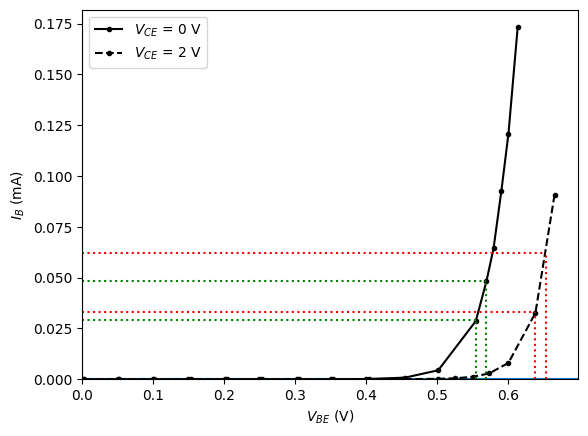

In [6]:
plt.axvline()
plt.axhline()

for i, chars in enumerate([input_chars1, input_chars2]):
    plt.plot(chars['vbe'], chars['ib']*1000, marks[i], label='$V_{CE}$' + f' = {chars["vce"]} V' )

plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)
    
plt.xlabel('$V_{BE}$ (V)')
plt.ylabel('$I_{B}$ (mA)')
plt.legend()

ri1 = 1000/slope_markers(x1=0.555, y1=0.0291, x2=0.57, y2=0.0486, marker='g:') # 0V
ri2 = 1000/slope_markers(x1=0.639, y1=0.0331, x2=0.654, y2=0.0621, marker='r:') # 2V

print('ri at 0V: ', ri1)
print('ri at 2V: ', ri2)

### output characterstics

In [7]:
out_chars1 = {
    'ib': 0,
    'vce': np.array([0.0047, 1.0006, 2.02, 3, 4.02, 5.04, 6.01, 7.02, 8.06, 9.02, 10.2]),
    'ic': np.array([0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2])*0.001,
}
out_chars2 = {
    'ib': 5,
    'vce': np.array([0.0056, 1.042, 2.03, 3.005, 4, 5.03, 6.01, 7.06, 8.09, 9.04, 10.06]),
    'ic': np.array([0, 0.713, 0.716, 0.718, 0.720, 0.722, 0.724, 0.726, 0.728, 0.733, 0.734]),
}
out_chars3 = {
    'ib': 20,
    'vce': np.array([0.0045, 1.01, 2, 3.02, 4.06, 5.02, 6.13, 7.05, 8.05, 9.09, 10.09]),
    'ic': np.array([0, 2.95, 2.95, 2.96, 2.97, 2.98, 2.99, 3.01, 3.02, 3.03, 3.04]),
}
out_chars4 = {
    'ib': 30,
    'vce': np.array([0.0042, 1.034, 2, 3.01, 4.08, 5.04, 6.06, 7.03, 8.05, 9.11, 10.07]),
    'ic': np.array([0, 4.44, 4.45, 4.48, 4.50, 4.52, 4.55, 4.57, 4.59, 4.60, 4.64]),
}
out_chars5 = {
    'ib': 40,
    'vce': np.array([0.00041, 1.18, 2.03, 3.03, 4.18, 5.14, 6.15, 7.1, 8.08, 8.84, 9.64]),
    'ic': np.array([0, 5.99, 6.01, 6.03, 6.06, 6.08, 6.11, 6.14, 6.17, 6.20, 6.27]),
}

ro at 0 uA : 8019.399999999999 k Ohm
ro at 5 uA : 399.89999999999964 k Ohm
ro at 20 uA : 101.00000000000047 k Ohm
ro at 30 uA : 50.47500000000023 k Ohm
ro at 40 uA : 36.47619047619048 k Ohm


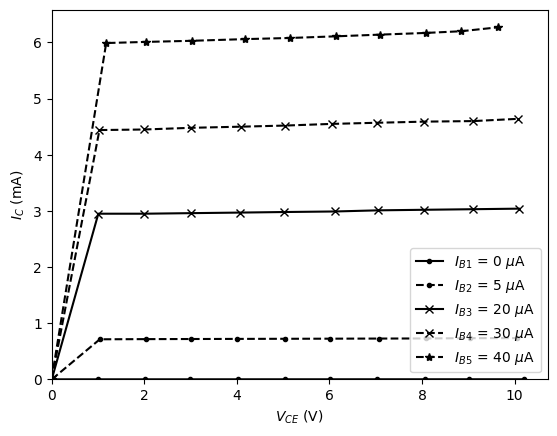

In [15]:
for i, chars in enumerate([out_chars1, out_chars2, out_chars3, out_chars4, out_chars5]):
    ro = (chars['vce'][-2]-chars['vce'][1])/(chars['ic'][-2]-chars['ic'][1])
    print(f'ro at {chars["ib"]} uA : {ro} k Ohm')
    plt.plot(chars['vce'], chars['ic'], marks[i], label='$I_B$'+ f'$_{i+1}$ = {chars["ib"]} $\mu$A')
    
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)
    
plt.xlabel('$V_{CE}$ (V)')
plt.ylabel('$I_{C}$ (mA)')
plt.legend()

### transfer characterstics

In [81]:
trans_chars = {
    'vce': 1,
    'vrb': np.array([0, 1.004, 2.009, 3.071, 4.21, 5.10, 6.1, 7.3, 8.27]),
    'ic': np.array([0, 1.45, 2.95, 4.55, 6.31, 7.68, 9.21, 10.76, 12.01])
}
trans_chars['ib'] = trans_chars['vrb']*1000/rb

Current amplification factor at 1V:  154.7826086956522


Text(0, 0.5, '$I_{C}$ (mA)')

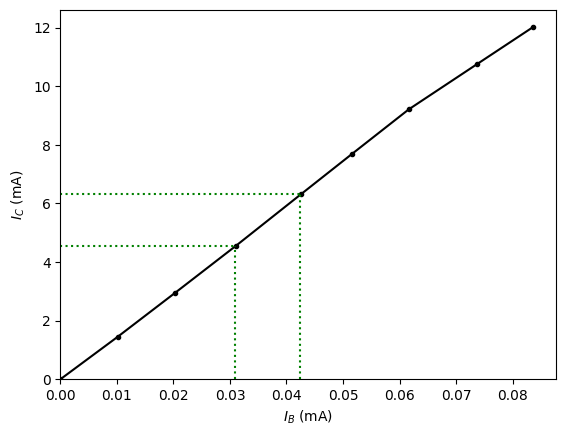

In [88]:
plt.plot(trans_chars['ib'], trans_chars['ic'], marks[0], label=f"{trans_chars['vce']} V")
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)

beta = slope_markers(x1=0.0424, y1=6.32, x2=0.0309, y2=4.54, marker='g:')
print('Current amplification factor at 1V: ', beta)

plt.xlabel('$I_{B}$ (mA)')
plt.ylabel('$I_{C}$ (mA)')

# CB config (PNP)

In [91]:
re = rc = 151.1

### input characterstics

In [99]:
input_chars1_ = {
    'vcb': 0,
    'veb': np.array([0.00031, 0.0514, 0.1006, 0.1512, 0.2053, 0.25, 0.3052, 0.3500, 0.4, 0.45, 0.456, 0.5, 0.53, 0.554, 0.615, 0.632, 0.647, 0.657, 0.698, 0.703, 0.761,0.875]),
    'vre': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0001, 0.0002, 0.0012, 0.0037, 0.0081, 0.0857, 0.160, 0.281, 0.406, 1.873, 2.047, 6.12, 11.2]),
}
input_chars2_ = {
    'vcb': 2,
    'veb': np.array([0.0039, 0.050, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.41, 0.438, 0.488, 0.512, 0.56, 0.611, 0.665, 0.698, 0.721]),
    'vre': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0001, 0.0008, 0.0021, 0.013, 0.0943, 3.208, 4.7, 7.13]),
}
input_chars1_['ie'] = input_chars1_['vre']/re
input_chars2_['ie'] = input_chars2_['vre']/re

ri at 0V:  3.513513513513502
ri at 2V:  2.1321961620469096


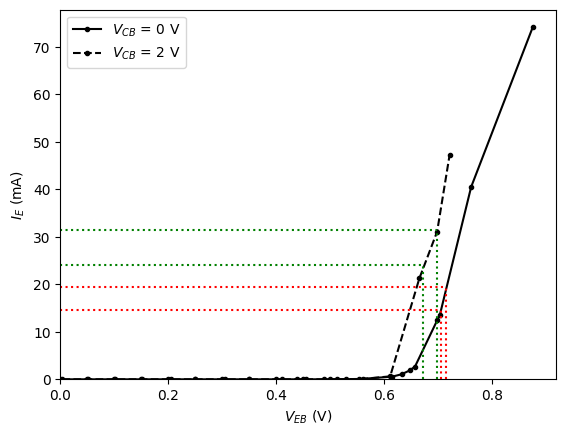

In [103]:
for i, chars in enumerate([input_chars1_, input_chars2_]):
    plt.plot(chars['veb'], chars['ie']*1000, marks[i], label='$V_{CB}$ = '+f'{chars["vcb"]} V')
    
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)

plt.xlabel('$V_{EB}$ (V)')
plt.ylabel('$I_{E}$ (mA)')
plt.legend()

ri1 = 1000/slope_markers(x1=0.698, y1=31.4, x2=0.672, y2=24, marker='g:') # 0V
ri2 = 1000/slope_markers(x1=0.715, y1=19.37, x2=0.705, y2=14.68, marker='r:') # 2V

print('ri at 0V: ', ri1)
print('ri at 2V: ', ri2)

### output characterstics

In [19]:
out_chars1_ = {
    'ie': 0,
    'vcb': np.array([-1.842, -0.998, 0.004, 1, 2.01, 3.05, 4.09, 5.02, 6.03, 7.05, 8.1, 9.08, 10.04, 11.01]),
    'ic': np.array([34.9, 6.6, 0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.2, 1.3])*0.001
}
out_chars2_ = {
    'ie': 5,
    'vcb': np.sort(np.array([-0.61, -0.12, 0.085, 1.055, 4.01, 6.3, 0.609, -0.746, -0.748, -0.758])),
    'ic': np.sort(np.array([3.4, 5.27, 4.93, 4.97, 4.97, 4.97, 4.94, 0.25, 0.18, 0]))
}
out_chars3_ = {
    'ie': 10,
    'vcb': np.sort(np.array([-0.652, -0.115, -0.281, -0.438, 0.421, 0.412, 3.08, 5, 7.33, -0.555, -0.498, -0.783, -0.788, -1.794])),
    'ic': np.sort(np.array([3.66, 9.98, 9.81, 9.56, 9.95, 9.96, 9.97, 9.99, 10.03, 6.98, 7.88, 0.26, 0.13, 0]))
}
out_chars4_ = {
    'ie': 15,
    'vcb': np.sort(np.array([-0.667, -0.604, -0.543, -0.514, -0.250, 1.03, 3.68, 6.57, -0.794, -0.802, -0.807])),
    'ic': np.sort(np.array([4.11, 6.15, 8.25, 9.23, 14.8, 14.92, 14.95, 14.95, 0.27, 0.1, 0]))
}
out_chars5_ = {
    'ie': 20,
    'vcb': np.sort(np.array([-0.685, -0.610, -0.5, -0.441, -0.976, 0.01, 1.769, 3.023, 5.05, 9.6, -0.168, -0.812, -0.818, -0.824])),
    'ic': np.sort(np.array([4.22, 6.68, 10.78, 13.22, 15.65, 19.91, 19.95, 19.98, 19.99, 20, 19.69, 0.28, 0.13, 0]))
}

ro at 0 uA : 7919.999999999998 k Ohm
ro at 5 uA : 18.83333333333338 k Ohm
ro at 10 uA : 98.82857142857354 k Ohm
ro at 15 uA : 1.2384615384615387 k Ohm
ro at 20 uA : 106.55555555555573 k Ohm


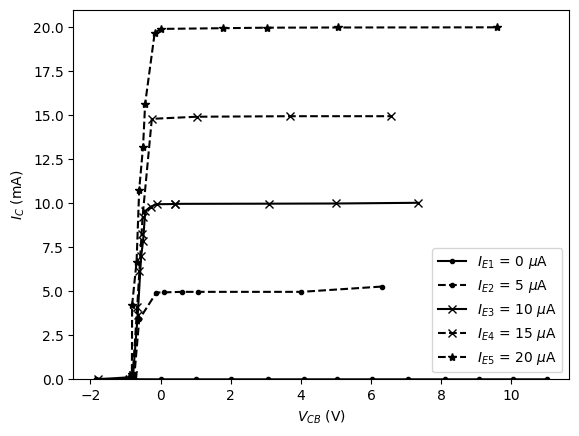

In [34]:
for i, chars in enumerate([out_chars1_, out_chars2_, out_chars3_, out_chars4_, out_chars5_]):
    ro = (chars['vcb'][-1]-chars['vcb'][-5])/(chars['ic'][-1]-chars['ic'][-5])
    print(f'ro at {chars["ie"]} uA : {ro} k Ohm')
    plt.plot(chars['vcb'], chars['ic'], marks[i], label='$I_E$'+ f'$_{i+1}$ = {chars["ie"]} $\mu$A')

plt.gca().set_ylim(bottom=0)
# plt.gca().set_xlim(left=0)
    
plt.xlabel('$V_{CB}$ (V)')
plt.ylabel('$I_{C}$ (mA)')
plt.legend()

### transfer characterstics

In [130]:
trans_chars_ = {
    'vcb': 1,
    'vre': np.sort(np.array([0, 1.091, 2.083, 3.148, 4.07, 3.567, 2.501, 6.683, 6.37, 4.8])),
    'ic': np.sort(np.array([0, 7.17, 13.73, 20.78, 26.95, 23.55, 16.49, 43.9, 41.3, 31.85]))
}
trans_chars_['ie'] = trans_chars_['vre']*1000/re

In [132]:
# ?%matplotlib
%matplotlib qt

In [137]:
%matplotlib inline

Current amplification factor: 1.0220994475138123


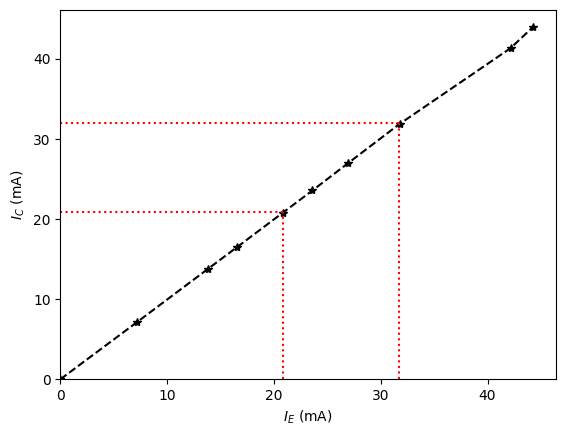

In [139]:
plt.plot(trans_chars_['ie'], trans_chars_['ic'], marks[4])
plt.xlabel('$I_{E}$ (mA)')
plt.ylabel('$I_{C}$ (mA)')

plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)

alpha = slope_markers(x1=31.74, y1=32, x2=20.88, y2=20.9, marker='r:') 
print('Current amplification factor:', alpha)